# Preview data

In [17]:
df = pd.read_csv("data.csv")

In [18]:
df.head(5)

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


# Check duplicate rows

In [20]:
duplicated = df.duplicated()

In [21]:
duplicated

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Length: 10000, dtype: bool

In [22]:
sum(duplicated)

0

# Feature Classification

In [26]:
df.nunique()

credit_score         460
country                3
gender                 2
age                   70
tenure                11
balance             6382
products_number        4
credit_card            2
active_member          2
estimated_salary    9999
churn                  2
dtype: int64

In [27]:
# Convert simultaneously columns that belong categorical
def convert_dtype_category(df, features):
    for feature in features:
        df[feature] = df[feature].astype("category")

In [33]:
converted_features = ["country","gender","tenure","products_number","credit_card","active_member","churn"]

In [34]:
convert_dtype_category(df, converted_features)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   credit_score      10000 non-null  int64   
 1   country           10000 non-null  category
 2   gender            10000 non-null  category
 3   age               10000 non-null  int64   
 4   tenure            10000 non-null  category
 5   balance           10000 non-null  float64 
 6   products_number   10000 non-null  category
 7   credit_card       10000 non-null  category
 8   active_member     10000 non-null  category
 9   estimated_salary  10000 non-null  float64 
 10  churn             10000 non-null  category
dtypes: category(7), float64(2), int64(2)
memory usage: 382.2 KB


In [36]:
# Distribution of numerical feature values across the samples
df.describe()

,credit_score,age,balance,estimated_salary
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,76485.889288,100090.239881
std,96.653299,10.487806,62397.405202,57510.492818
min,350.000000,18.000000,0.000000,11.580000
25%,584.000000,32.000000,0.000000,51002.110000
50%,652.000000,37.000000,97198.540000,100193.915000
75%,718.000000,44.000000,127644.240000,149388.247500
max,850.000000,92.000000,250898.090000,199992.480000


In [39]:
# Distribution of categorical feature values across the samples
df.describe(include=["category"])

,country,gender,tenure,products_number,credit_card,active_member,churn
count,10000,10000,10000,10000,10000,10000,10000
unique,3,2,11,4,2,2,2
top,France,Male,2,1,1,1,0
freq,5014,5457,1048,5084,7055,5151,7963


# EDA

In [24]:
df = df.drop(['customer_id'], axis=1)

In [25]:
df.head(5)

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [42]:
# import module
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
%matplotlib inline

In [44]:
sns.set_theme() 

# Target Variable

In [45]:
df["churn"].value_counts().to_frame()

,churn
0,7963
1,2037


In [46]:
df["churn"].value_counts(normalize = True).to_frame()

,churn
0,0.7963
1,0.2037


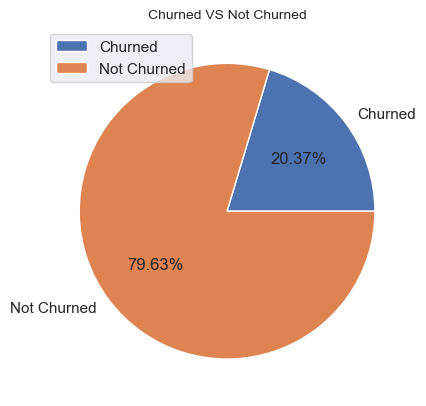

In [47]:
# Get percentage of each class in target column (churn column)

sizes = [df.churn[df['churn'] == 1].count(), df.churn[df['churn'] == 0].count()]
labels = ['Churned', 'Not Churned']
plt.pie(sizes, labels=labels, autopct = '%.2f%%')
plt.legend(loc='upper left')
plt.title("Churned VS Not Churned", size = 10)
plt.show()

# EDA for categorical features

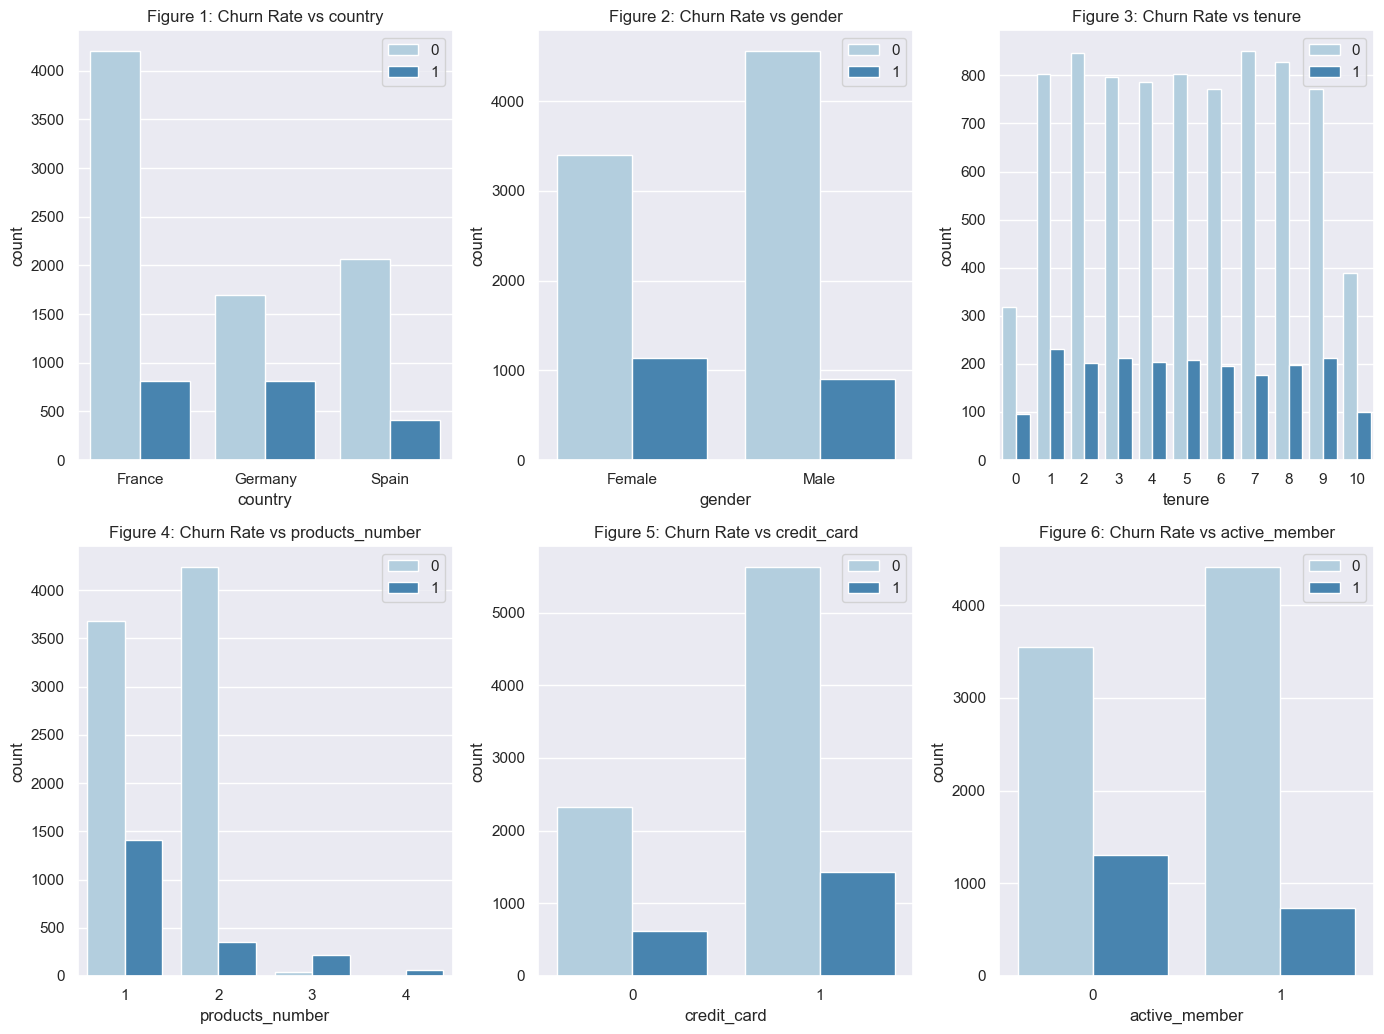

In [81]:
cate_features = ["country","gender","tenure","products_number","credit_card","active_member"]
n_rows = 2
n_cols = 3

fig, ax = plt.subplots(n_rows,n_cols, figsize=(n_rows*7,n_cols*3.5))

for r in range(0,n_rows):
    for c in range(0,n_cols):
        i = r*n_cols + c # index to loop through list "cols"
        if i < len(cate_features):
            ax_i = ax[c] if n_rows == 1 else ax[r, c]
            sns.countplot(data= df, x = cate_features[i], hue = "churn", palette = "Blues", ax = ax_i);
            ax_i.set_title(f"Figure {i+1}: Churn Rate vs {cate_features[i]}")
            ax_i.legend(title="",loc="upper right")
plt.tight_layout()
plt.show()

One test case Feature

feature country

In [51]:
# Get unique value of this column
countries = list(df['country'].unique())
countries

['France', 'Spain', 'Germany']

In [52]:
# Number of rows each country
df['country'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: country, dtype: int64

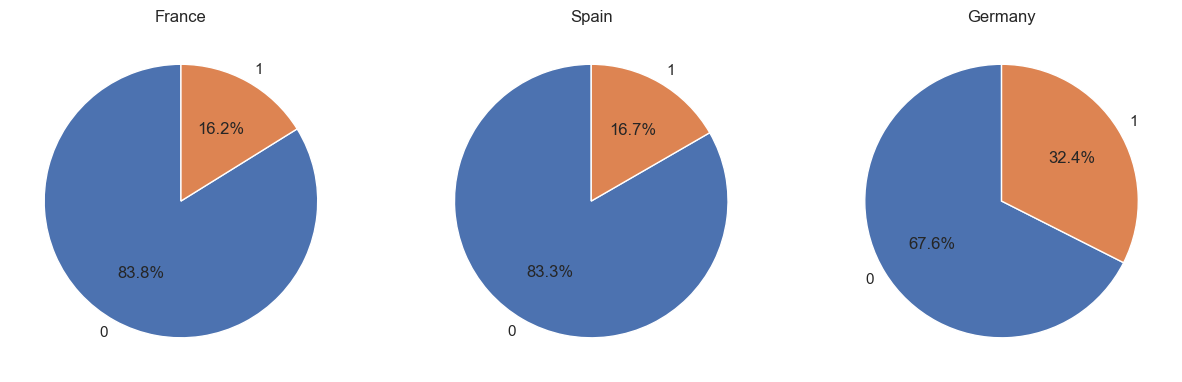

In [53]:
# Distribution of each country about the churn

fig, axes = plt.subplots(1, len(countries), figsize=(15, 5))

for ax, country in zip(axes, countries):
    # Filter the dataframe by country
    country_data = df[df['country'] == country]

    # Count the churn values
    churn_counts = country_data['churn'].value_counts()

    # Plot the pie chart
    ax.pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%', startangle=90)
    ax.set_title(f'{country}')

plt.show()

Gender Features

In [56]:
# Get unique value of this column
gender = list(df['gender'].unique())
gender

['Female', 'Male']

In [57]:
# Number of rows each country
df['gender'].value_counts()

Male      5457
Female    4543
Name: gender, dtype: int64

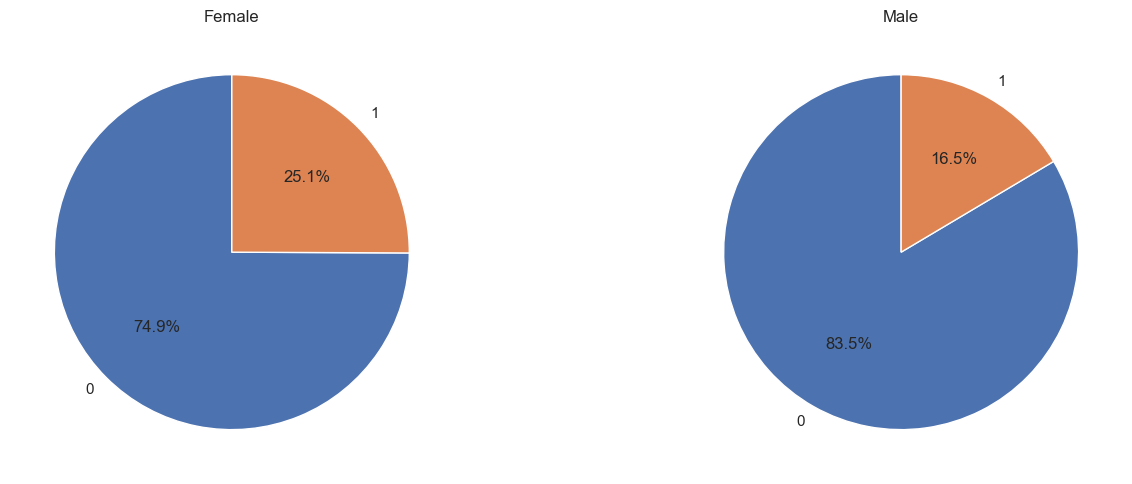

In [59]:
# Tạo subplot với số lượng axes bằng với số lượng giới tính
fig, axes = plt.subplots(1, len(gender), figsize=(15, 5))

for ax, gen in zip(axes, gender):
    # Lọc DataFrame theo giới tính
    gender_data = df[df['gender'] == gen]

    # Đếm giá trị churn
    churn_counts = gender_data['churn'].value_counts()

    # Vẽ biểu đồ tròn
    ax.pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%', startangle=90)
    ax.set_title(f'{gen}')

plt.tight_layout()
plt.show()

tenure feature

In [66]:
# Get unique value of this column
tenures = list(df['tenure'].unique())
tenures

[2, 1, 8, 7, 4, 6, 3, 10, 5, 9, 0]

In [64]:
# Number of rows each country
df['tenure'].value_counts()

2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: tenure, dtype: int64

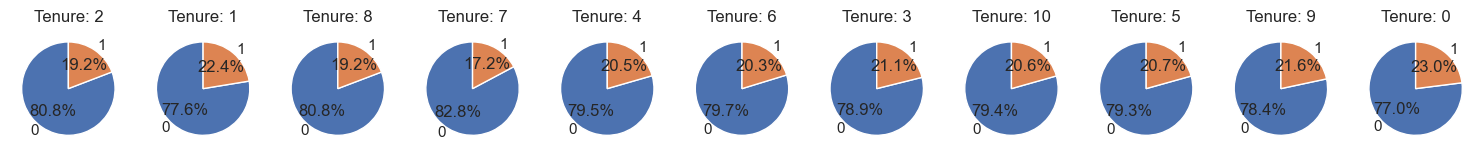

In [67]:
# Tạo subplot với số lượng axes bằng với số lượng khoảng thời gian
fig, axes = plt.subplots(1, len(tenures), figsize=(15, 5))

for ax, tenure in zip(axes, tenures):
    # Lọc DataFrame theo khoảng thời gian hiện tại
    tenure_data = df[df['tenure'] == tenure]

    # Đếm giá trị churn
    churn_counts = tenure_data['churn'].value_counts()

    # Vẽ biểu đồ tròn
    ax.pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%', startangle=90)
    ax.set_title(f'Tenure: {tenure}')

plt.tight_layout()
plt.show()

From this plot, we can see that:
tenure:
- The distribution of churn does not vary significantly across different tenure values.
  
products_number
- In this dataset, most customers have either one or two products.
- There is a trend indicating that customers with one product have a higher churn rate than those with two products.
- Customers who have more than two products tend to have a higher churn rate.
  
credit_card
Customers without a credit card have a slightly higher churn rate compared to those with a credit card.

active_member
Non_active member exhibit a significantly higher churn rate compared to active members.

# EDA for numerical features

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   credit_score      10000 non-null  int64   
 1   country           10000 non-null  category
 2   gender            10000 non-null  category
 3   age               10000 non-null  int64   
 4   tenure            10000 non-null  category
 5   balance           10000 non-null  float64 
 6   products_number   10000 non-null  category
 7   credit_card       10000 non-null  category
 8   active_member     10000 non-null  category
 9   estimated_salary  10000 non-null  float64 
 10  churn             10000 non-null  category
dtypes: category(7), float64(2), int64(2)
memory usage: 382.2 KB


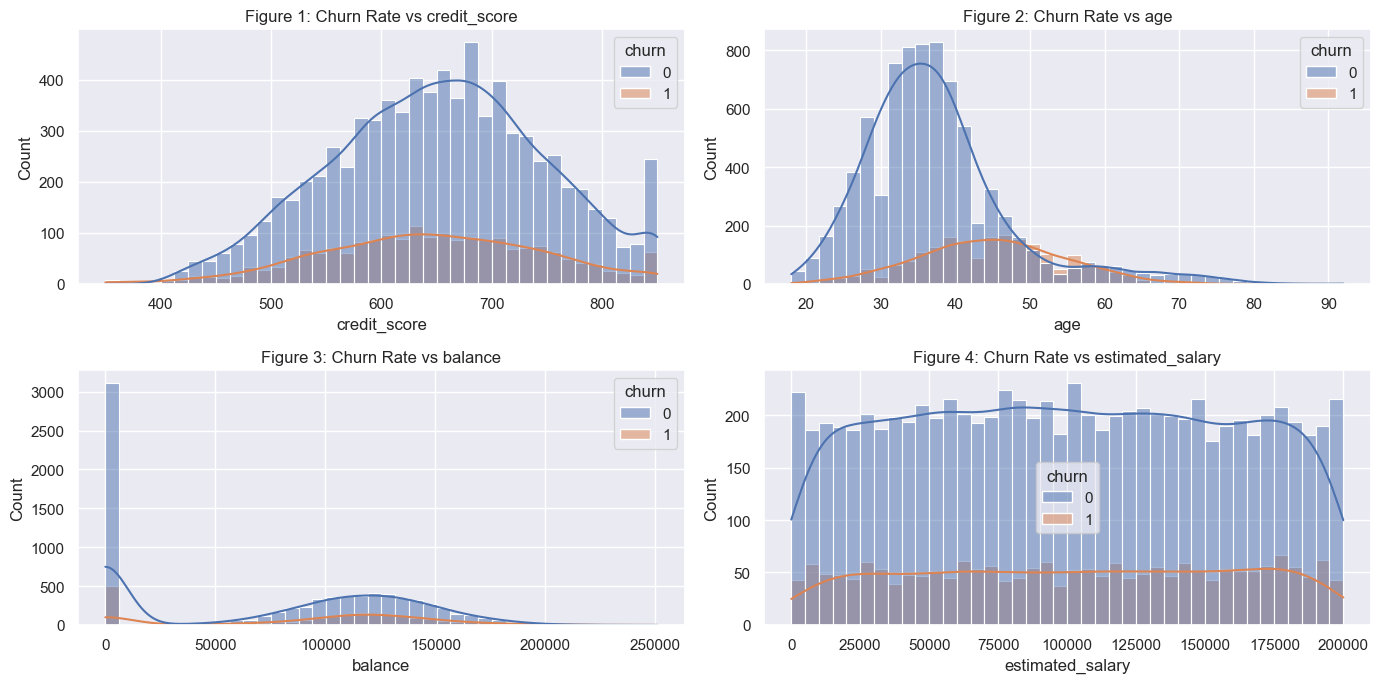

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_features = ["credit_score","age","balance","estimated_salary"]
n_rows = 2
n_cols = 2

fig, ax = plt.subplots(n_rows, n_cols, figsize=(n_cols*7, n_rows*3.5))

for r in range(n_rows):
    for c in range(n_cols):
        i = r * n_cols + c # index to loop through list "cols"
        if i < len(numerical_features):
            ax_i = ax[c] if n_rows == 1 else ax[r, c]
            sns.histplot(data=df, x=numerical_features[i], bins=40, kde=True, hue="churn",  ax=ax_i)
            ax_i.set_title(f"Figure {i+1}: Churn Rate vs {numerical_features[i]}")
plt.tight_layout()
plt.show()

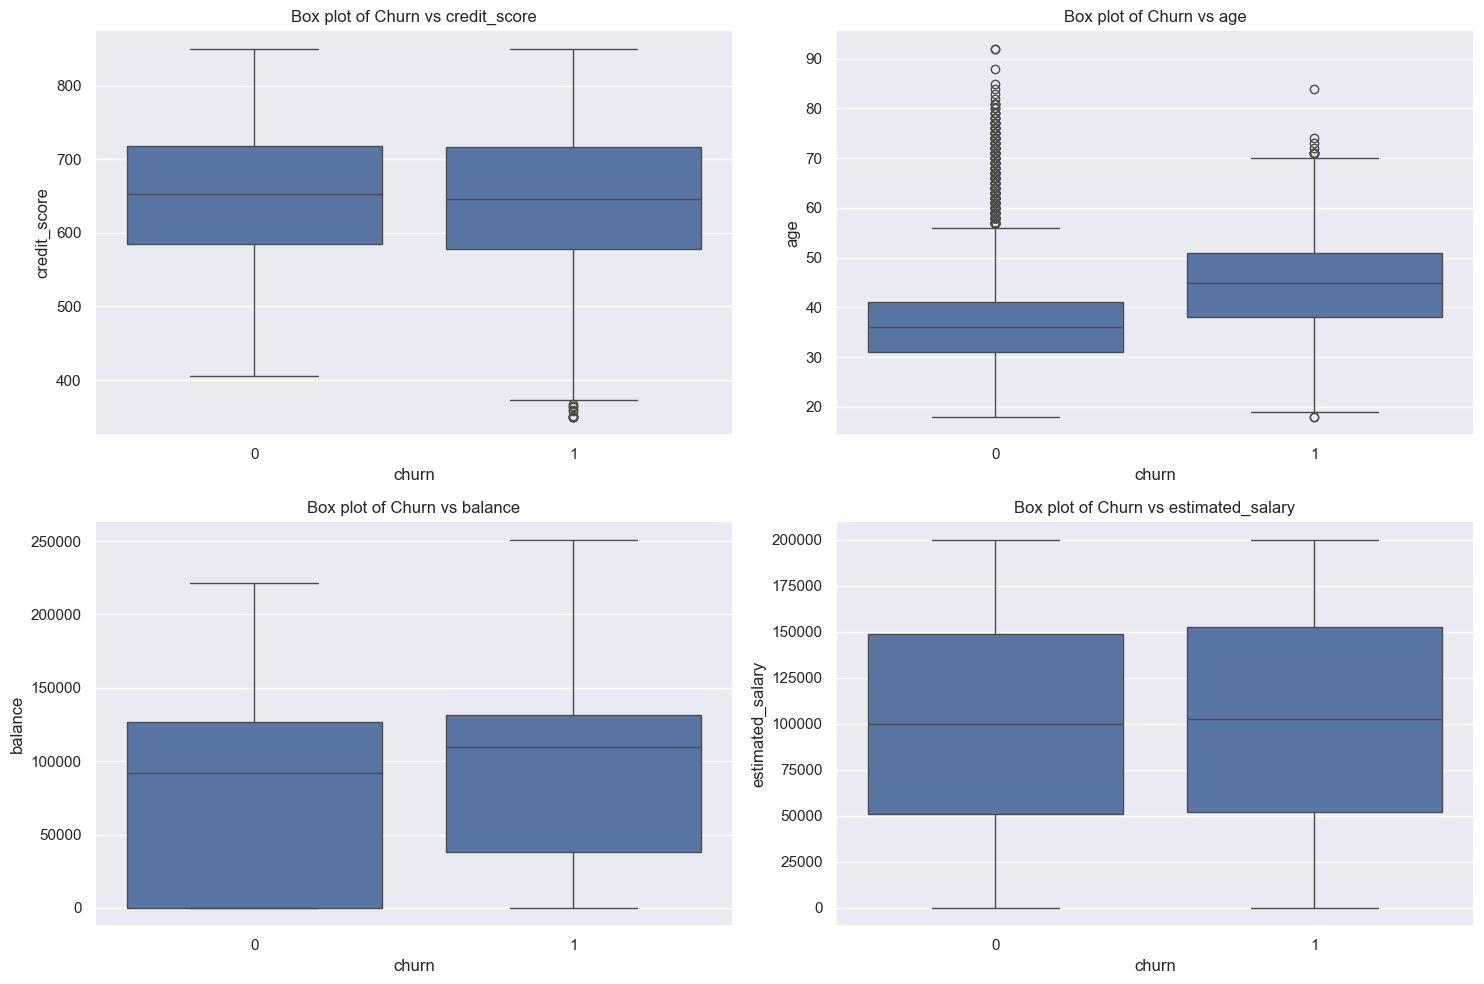

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns

# Đặt kích thước cho các biểu đồ
plt.figure(figsize=(15, 10))

# Vẽ biểu đồ box plot cho từng biến
for i, feature in enumerate(numerical_features):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x='churn', y=feature, data=df)
    plt.title(f'Box plot of Churn vs {feature}')

plt.tight_layout()
plt.show()


# Heat Map

In [82]:
from sklearn.preprocessing import LabelEncoder

In [83]:
# Convert column with value type: string to int

df['country'] = LabelEncoder().fit_transform(df['country'])
df['gender'] = LabelEncoder().fit_transform(df['gender'])

In [86]:
# Convert simultaneously categorical type to int or float type
def convert_dtype_integer(df, features):
    for feature in features:
        df[feature] = df[feature].astype("float64")

In [87]:
converted_features = ["country","gender","tenure","products_number","credit_card","active_member","churn"]

In [88]:
convert_dtype_integer(df, converted_features)

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   credit_score      10000 non-null  int64  
 1   country           10000 non-null  float64
 2   gender            10000 non-null  float64
 3   age               10000 non-null  int64  
 4   tenure            10000 non-null  float64
 5   balance           10000 non-null  float64
 6   products_number   10000 non-null  float64
 7   credit_card       10000 non-null  float64
 8   active_member     10000 non-null  float64
 9   estimated_salary  10000 non-null  float64
 10  churn             10000 non-null  float64
dtypes: float64(9), int64(2)
memory usage: 859.5 KB


In [90]:
# corr
df_corr = df.corr() #Get correlation data

In [91]:
df_corr

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
credit_score,1.000000,0.007888,-0.002857,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
country,0.007888,1.000000,0.004719,0.022812,0.003739,0.069408,0.003972,-0.008523,0.006724,-0.001369,0.035943
gender,-0.002857,0.004719,1.000000,-0.027544,0.014733,0.012087,-0.021859,0.005766,0.022544,-0.008112,-0.106512
age,-0.003965,0.022812,-0.027544,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
tenure,0.000842,0.003739,0.014733,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
balance,0.006268,0.069408,0.012087,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
products_number,0.012238,0.003972,-0.021859,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
credit_card,-0.005458,-0.008523,0.005766,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
active_member,0.025651,0.006724,0.022544,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
estimated_salary,-0.001384,-0.001369,-0.008112,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097


In [92]:
# ones_like can build a matrix of boolean (True, False) with the same shape as our data
ones_corr  = np.ones_like(df_corr,dtype=bool)

In [93]:
ones_corr.shape, df_corr.shape

((11, 11), (11, 11))

In [94]:
# np. triu: return only upper triangle matrix
mask = np.triu(ones_corr)

In [95]:
mask

array([[ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True],
       [False,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True],
       [False, False,  True,  True,  True,  True,  True,  True,  True,
         True,  True],
       [False, False, False,  True,  True,  True,  True,  True,  True,
         True,  True],
       [False, False, False, False,  True,  True,  True,  True,  True,
         True,  True],
       [False, False, False, False, False,  True,  True,  True,  True,
         True,  True],
       [False, False, False, False, False, False,  True,  True,  True,
         True,  True],
       [False, False, False, False, False, False, False,  True,  True,
         True,  True],
       [False, False, False, False, False, False, False, False,  True,
         True,  True],
       [False, False, False, False, False, False, False, False, False,
         True,  True],
       [False, False, False, False, False, False, False, Fal

In [96]:
adjusted_mask = mask[1:,:-1]

In [97]:
adjusted_mask

array([[False,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [False, False,  True,  True,  True,  True,  True,  True,  True,
         True],
       [False, False, False,  True,  True,  True,  True,  True,  True,
         True],
       [False, False, False, False,  True,  True,  True,  True,  True,
         True],
       [False, False, False, False, False,  True,  True,  True,  True,
         True],
       [False, False, False, False, False, False,  True,  True,  True,
         True],
       [False, False, False, False, False, False, False,  True,  True,
         True],
       [False, False, False, False, False, False, False, False,  True,
         True],
       [False, False, False, False, False, False, False, False, False,
         True],
       [False, False, False, False, False, False, False, False, False,
        False]])

In [98]:
adjusted_df_corr = df_corr.iloc[1:,:-1]

In [99]:
adjusted_df_corr

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary
country,0.007888,1.000000,0.004719,0.022812,0.003739,0.069408,0.003972,-0.008523,0.006724,-0.001369
gender,-0.002857,0.004719,1.000000,-0.027544,0.014733,0.012087,-0.021859,0.005766,0.022544,-0.008112
age,-0.003965,0.022812,-0.027544,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201
tenure,0.000842,0.003739,0.014733,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784
balance,0.006268,0.069408,0.012087,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797
products_number,0.012238,0.003972,-0.021859,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204
credit_card,-0.005458,-0.008523,0.005766,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933
active_member,0.025651,0.006724,0.022544,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421
estimated_salary,-0.001384,-0.001369,-0.008112,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000
churn,-0.027094,0.035943,-0.106512,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097


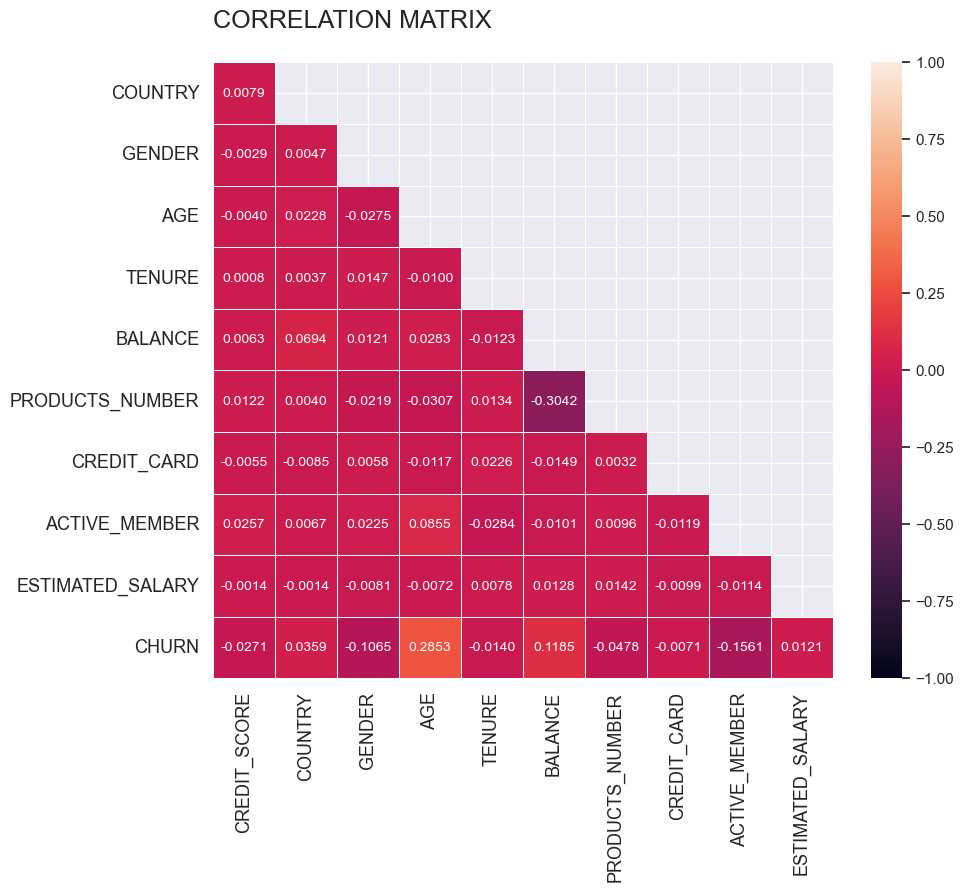

In [103]:
fig, ax = plt.subplots(figsize=(10,8))


#That method uses HUSL colors, so you need hue, saturation, and lightness. 
#I used hsluv.org to select the colors of this chart.
#cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap=True)

sns.heatmap(data= adjusted_df_corr, mask=adjusted_mask,
            annot=True, annot_kws={"fontsize":10}, fmt=".4f",
            vmin=-1, vmax=1,
            linecolor='white', linewidths=0.5);

yticks = [i.upper() for i in adjusted_df_corr.index]
xticks = [i.upper() for i in adjusted_df_corr.columns]

ax.set_yticklabels(yticks, rotation=0, fontsize=13);
ax.set_xticklabels(xticks, rotation=90, fontsize=13);
title = 'CORRELATION MATRIX\n'
ax.set_title(title, loc='left', fontsize=18);